# Установка библиотек

In [1]:
import pandas as pd #для работы с таблицами

C:\Users\79602\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Для автоматического применения статистического критерия (теста) используется модуль `stats` библиотеки `scipy`.

Этот модуль содержит большое количество вероятностных распределений, корреляционные функции и статистические тесты и многое другое.

Также активно используется библиотека `statsmodels`

Для установки библиотеки `scipy` и `statsmodels` можно воспользоваться менеджером пакетов `pip`.

In [2]:
!pip install scipy

In [3]:
!pip install statsmodels


# Загрузка данных

Для скачивания данных используем команду `!wget`. 

Данные появятся в локальной директории.

Мы будем использовать информацию о диаметре пицц разных производителей.

In [14]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=6e03d30d7469af88ecdc8200d87e352fa5f9ae0afb77e146b0df667b692986a2
  Stored in directory: c:\users\79602\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [15]:
import wget
wget.download('https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv')

100% [..................................................................................] 539 / 539

'pizzas.csv'

Загрузим данные в память ноутбука.

In [16]:
data = pd.read_csv('pizzas.csv')

In [18]:
data.rename(columns={'Making Unit 1': 'Пиццерия №1', 'Making Unit 2': 'Пиццерия №2'}, inplace=True)

In [19]:
data.head()

,Пиццерия №1,Пиццерия №2
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


# Проверка данных на нормальность


In [20]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [21]:
alpha = 0.05

## Тест Шапиро-Уилка

In [22]:
from scipy.stats import shapiro

In [23]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.204
Данные распределены нормально


## Тест Д’Агостино

In [24]:
from scipy.stats import normaltest

In [25]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.251
Данные распределены нормально


# Независимый T-тест 

In [26]:
from scipy.stats import ttest_ind

In [27]:
H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

Зависимая переменная (диаметр пиццы) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [28]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['Пиццерия №1'], data['Пиццерия №2'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.47 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между диаметрами пиццы в разных пиццериях.


-----

# Корреляция Спирмана 

In [29]:
from numpy.random import rand
from scipy.stats import spearmanr

data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)


corr, p = spearmanr(data1, data2)

In [30]:
print(corr,p)

0.8936648216648215 0.0


In [31]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.


# ANOVA тест

In [32]:
from scipy.stats import f_oneway

Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [33]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [34]:
_, p = f_oneway(petersburg, magadan, tvarminne)

In [35]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

In [36]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.007870900547143827 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.


_____

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [39]:
pet = pd.Series(petersburg)
mag = pd.Series(magadan)

In [83]:
df = pd.concat([pet, mag], axis=1)
df[0] = df[0]. fillna (df[0].mean())
df

,0,1
0,0.097400,0.1033
1,0.135200,0.0915
2,0.081700,0.0781
3,0.101600,0.0685
4,0.096800,0.0677
5,0.106400,0.0697
6,0.105000,0.0764
7,0.103443,0.0689


In [47]:
import statistics

In [86]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

_, p = shapiro(df)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.100
Данные распределены нормально


In [87]:
_, p = normaltest(df)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.042
Данные распределены нормально


C:\Users\79602\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


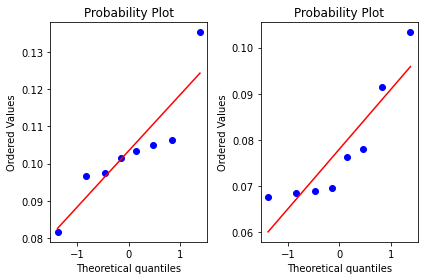

In [75]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df[0], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
stats.probplot(df[1], plot=plt) # qq plot

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Тесты Шапиро и Д.Агостино показывают нам, что данных в датасете распределны нормально. Тип переменных в выборке - количественная. Сравниваемых групп - 2. Объектов в выборке менее 30. Соответственно делаем вывод, что для сравнения будем использовать параметрический Т-тест.

In [90]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(df[0], df[1], equal_var=True)

    p = round(test_results[1],3)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(df)


*** Результаты независимого T-теста ***
0.003 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.


так как данные распределены нормально, используем корреляцию Спирмена

In [77]:
round(df.corr(),2)

,0,1
0,1.00,0.24
1,0.24,1.00


<AxesSubplot: >

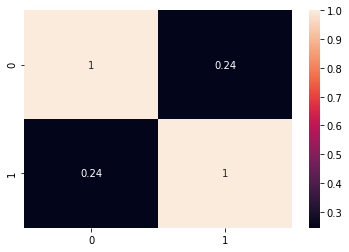

In [91]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True)

Корреляция = 0.24, что говорит о слабой корреляции

In [97]:
sred = abs(round(df[0].mean()-df[1].mean(),3))
sred

0.025

Разница в среднем размере мидий в зависимости от города составляет 0.025

# Бонус

Скачаем датасет, содержащий информацию по давлению 120 человек.



In [103]:
wget.download('https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv')

#!wget https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv

HTTPError: HTTP Error 404: Not Found

# HTTPError: HTTP Error 404: Not Found
Не получислось скачать

In [5]:
data = pd.read_csv('blood_pressure.csv')

In [6]:
print('Размер выборки: ', data.shape)

Размер выборки:  (120, 5)


In [7]:
data.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


## Z-тест

Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [8]:
from statsmodels.stats import weightstats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
_ ,p = weightstats.ztest(data['bp_before'], x2=data['bp_after'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

0.002162306611369422
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


## Z-тест на пропорцию

Z-критерий одной пропорции используется для сравнения наблюдаемой пропорции с теоретической.

В этом тесте используются следующие нулевые гипотезы:

$H_0: p = p_0$ (доля мужчин, предоставивших данные о своем давлении, равна гипотетической пропорции $p_0$)

Альтернативная гипотеза может быть двусторонней, левосторонней или правосторонней:

$H_1 (двусторонний): p ≠ p_0$ (доля мужчин не равна некоторому гипотетическому значению $p_0$)
$H_1 (левосторонний): p < p_0$ (доля мужчин меньше некоторого гипотетического значения $p_0$)
$H_1 (правосторонний): p > p_0$ (доля мужчин больше некоторого гипотетического значения $p_0$)

Предположим, что доля мужчин в нашем датачете равна 40%.

$p_0$: гипотетическая доля мужчин = 0.40

$x$: число мужчин в выборке мужчин: `len(data[data.sex == 'Male'])`

$n$: размер выборки = `len(data)`

Покажем, как использовать функцию `proportions_ztest` для выполнения  **z-теста**:

In [13]:
p_0 = 0.4
n = len(data)
x = len(data[data.sex == 'Male'])

print(n, x)

120 60


In [15]:
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

In [16]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.
